In [ ]:
# Bibliotecas para trabalhar com os dados.
import numpy as np
import pandas as pd


# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns


# Para processar os dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Para criar o modelo
import tensorflow as tf

# Calcular métricas de desempenho
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Para garantimos que os mesmos números aleatórios sejam gerados toda vez que o código for executado.

tf.random.set_seed(50)

In [ ]:
# Carregar os dados da tabela atletas

data = pd.read_csv('/content/athlete_events.csv')

In [ ]:
# Visualizar os dados

data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
# Verificar informações dos dados.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB




##Ajustar a coluna Medalhas

In [ ]:
# Vamos prever se um atleta vai ganhar uma medalha, não se é de ouro, prata ou bronze.
# Então vamos transformar os dados da coluna Medal para 0 se não tiver medalha, e 1 se tiver medalha.

data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

## Limpeza dos dados

In [ ]:
# Retirar as colunas ID, Name, Games e NOC que são desnecessárias.

data = data.drop(['ID', 'Name', 'Games','NOC'], axis=1)

In [ ]:
# Somar os dados faltantes em cada linha

data.isna().sum()

,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
Year,0
Season,0
City,0
Sport,0
Event,0


In [ ]:
# Verificar o percentual de dados faltantes em cada linha

data.isna().mean()

,0
Sex,0.000000
Age,0.034944
Height,0.221938
Weight,0.231912
Team,0.000000
Year,0.000000
Season,0.000000
City,0.000000
Sport,0.000000
Event,0.000000


In [ ]:
# Para tratar os dados, precisamos completar os dados faltantes.
# Faremos isso incluindo a média de altura e peso para os atletas que não tiverem o dado.
# Agruparemos pelo sexo, para que a média seja um pouco mais fidedigna.

# Agrupar por Medal e Sex e calcular a média das colunas numéricas

data.groupby(['Medal', 'Sex']).mean(numeric_only=True).astype(int)

Age  Height  Weight  Year
Medal Sex                           
0     F     23     167      59  1992
      M     26     178      75  1974
1     F     24     170      63  1992
      M     26     181      79  1966

In [ ]:
# Preencher valores ausentes com a média por grupo (Medal e Sex)

for column in ['Age', 'Height', 'Weight']:
    data[column] = data.groupby(['Medal', 'Sex'])[column].transform(lambda x: x.fillna(x.mean()).astype(int))

In [ ]:
# Checar os dados

print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


In [ ]:
#Gera os arquivos CSV
import os
from google.colab import files

# Cria a pasta de saída caso não exista
if not os.path.exists('/content/Saida'):
    os.makedirs('/content/Saida')

# Salva os arquivos no caminho /content/Saida/
data.to_csv('/content/Saida/df_athlete_events_transformed.csv', index=False)

# Baixa os arquivos no computador
files.download('/content/Saida/df_athlete_events_transformed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


## Condificação dos dados

In [ ]:
# Contar valores únicos para colunas do tipo object
unique_counts = {column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

# Exibir o dicionário com contagens de valores únicos
print(unique_counts)


{'Sex': 2, 'Team': 1184, 'Season': 2, 'City': 42, 'Sport': 66, 'Event': 765}


In [ ]:

# Transforma colunas categóricas em variáveis binárias (0 e 1), onde 1 indica a presença de um valor positivo específico e 0 indica a ausência.

def binary_encode(df, columns, positive_values):
    df = df.copy()  # Cria uma cópia do DataFrame original para evitar modificações indesejadas
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)  # Codificação binária
    return df  # Retorna o DataFrame modificado


In [ ]:
# Realiza a codificação one-hot para colunas categóricas, criando colunas adicionais para cada categoria e atribuindo 1 ou 0, dependendo da presença da categoria

def onehot_encode(df, columns, prefixes):
    df = df.copy()  # Cria uma cópia do DataFrame original
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)  # Criação de variáveis dummies
        df = pd.concat([df, dummies], axis=1)  # Adiciona as novas colunas ao DataFrame
        df = df.drop(column, axis=1)  # Remove a coluna original
    return df  # Retorna o DataFrame modificado


In [ ]:
# Transformar a coluna 'Sex' e 'Season' em valores binários, onde 'M' se torna 1 e 'F' se torna 0 (para 'Sex'), e 'Summer' se torna 1 e 'Winter' se torna 0 (para 'Season')

data = binary_encode(
    data,
    columns=['Sex', 'Season'],
    positive_values=['M', 'Summer']
)


# Criar variáveis dummies para as colunas 'Team', 'City', 'Sport' e 'Event'

data = onehot_encode(
    data,
    columns=['Team', 'City', 'Sport', 'Event'],
    prefixes=['T', 'C', 'S', 'E']
)


In [ ]:
# Verificar quantas colunas não numéricas (ou seja, do tipo object) ainda estão presentes no DataFrame:

print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))

Remaining non-numeric columns: 0


##Visualizar Correlações

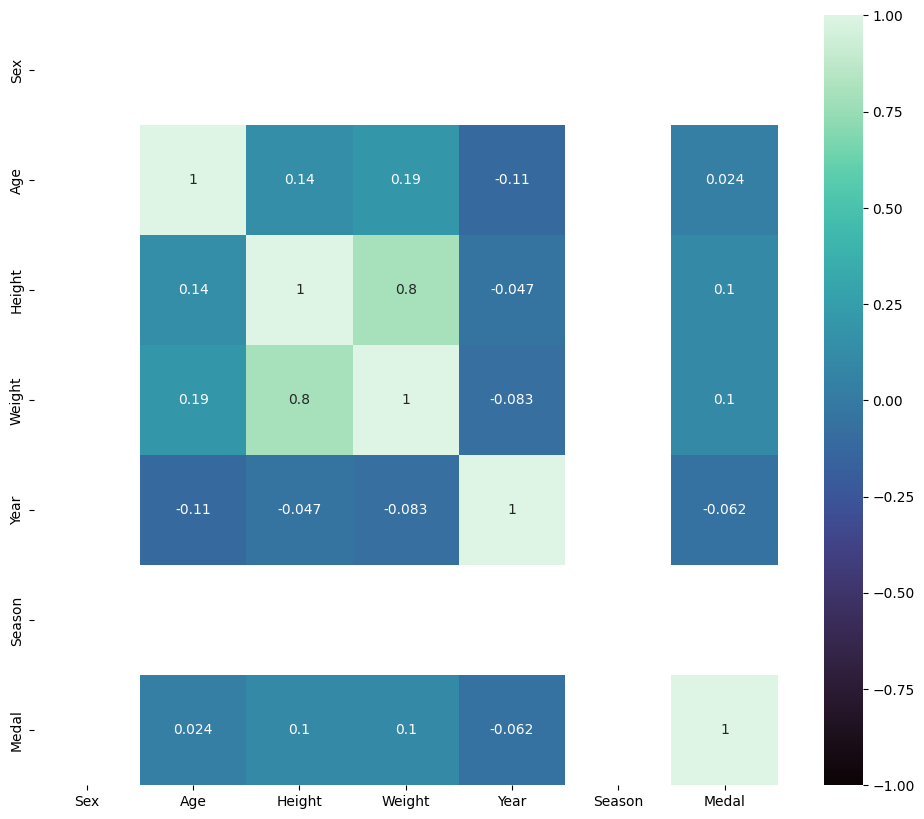

In [ ]:
# Gerar uma matriz de correlação e a visualizar em um mapa de calor
# Identificar rapidamente quais variáveis estão fortemente correlacionadas para entender padrões nos dados e ajudar na seleção de características para a modelagem.

corr = data.loc[:, :'Medal'].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

##Preparar dados para modelo de aprendizado de máquina

In [ ]:
# Amostragem dos dados

sample_data = data.sample(frac=0.5, random_state=42)

In [ ]:
# Definição da Variável Alvo (y)

y = sample_data['Medal'].copy()


# Definição das Variáveis de Entrada (X)

X = sample_data.drop('Medal', axis=1).copy()

In [ ]:
print("Número de valores ausentes em y:", y.isna().sum())

Número de valores ausentes em y: 0


In [ ]:
# Normalizar as características do conjunto de dados

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [ ]:
X.shape

(135558, 2063)

In [ ]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 14.6% / 85.4%


In [ ]:
# Definir, compilar e treinar um modelo de rede neural usando o TensorFlow e Keras.

# Define a camada de entrada do modelo, onde X.shape[1] representa o número de características do conjunto de dados.
inputs = tf.keras.Input(shape=(X.shape[1],))

# Duas camadas densas com 64 neurônios cada, usando a função de ativação ReLU (Rectified Linear Unit).

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

# A camada de saída tem um único neurônio e usa a função de ativação sigmoide, para problemas de classificação binária.
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.Model(inputs, outputs)

# O modelo é compilado com o otimizador Adam, a função de perda binary_crossentropy (adequada para classificação binária) e as métricas de precisão (accuracy) e AUC (Área sob a curva ROC)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

# O modelo é treinado usando 80% dos dados para o treinamento e 20% para validação.
# O batch_size é definido como 32 e o treinamento ocorre por até 100 épocas.
# O EarlyStopping é usado para interromper o treinamento se a perda de validação não melhorar após 3 épocas, restaurando os pesos do modelo para a melhor época.

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
2373/2373 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8514 - auc: 0.7187 - loss: 0.3849 - val_accuracy: 0.8735 - val_auc: 0.8117 - val_loss: 0.3294
Epoch 2/100
2373/2373 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8764 - auc: 0.8338 - loss: 0.3097 - val_accuracy: 0.8833 - val_auc: 0.8338 - val_loss: 0.3118
Epoch 3/100
2373/2373 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8902 - auc: 0.8704 - loss: 0.2781 - val_accuracy: 0.8887 - val_auc: 0.8430 - val_loss: 0.3081
Epoch 4/100
2373/2373 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9003 - auc: 0.8975 - loss: 0.2513 - val_accuracy: 0.8916 - val_auc: 0.8469 - val_loss: 0.3132
Epoch 5/100
2373/2373 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9091 - auc: 0.9178 - loss: 0.2282 - val_accuracy: 0.8899 - val_auc: 0.8454 - val_loss: 0.3313
Epoch 6/100
2373/2373 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9167 - auc: 0.9327 - loss: 0.2088 - val_accuracy: 0.8898 - val_auc: 0.8447 - val_loss: 0.3433


## Resultados

In [ ]:
# Avaliar o modelo nos dados de teste

loss, accuracy, auc = model.evaluate(X_test, y_test)

# Exibir os resultados

print(f"Loss: {loss:.4f}") # loss: A perda do modelo nos dados de teste.
print(f"Accuracy: {accuracy:.4f}") # accuracy: A precisão do modelo nos dados de teste.
print(f"AUC: {auc:.4f}") # auc: A área sob a curva (AUC) que avalia a capacidade do modelo em distinguir entre as classes.

1271/1271 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8828 - auc: 0.8343 - loss: 0.3168
Loss: 0.3170
Accuracy: 0.8834
AUC: 0.8342


In [ ]:
# Geração das previsões com o modelo
y_pred_prob = model.predict(X_test)  # Previsões de probabilidade
y_pred = (y_pred_prob >= 0.5).astype(int)  # Converter probabilidades em classes (1 ou 0)

# Garantir que y_true está definido corretamente
y_true = np.array(y_test)  # Certifique-se de que y_test está acessível

# Exibir os resultados das previsões
print("Valores reais:", y_true.flatten())  # flatten() para simplificar a exibição
print("Previsões:", y_pred.flatten())  # flatten() para simplificar a exibição

1271/1271 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
Valores reais: [0 0 0 ... 0 1 0]
Previsões: [0 0 0 ... 0 0 0]


In [ ]:
# Calcular e exibir a acurácia

accuracy = accuracy_score(y_true, y_pred)
print(f"Acurácia: {accuracy:.4f}") # Mede a proporção de previsões corretas.

Acurácia: 0.8834


In [ ]:
# Relatório de classificação

class_report = classification_report(y_true, y_pred)
print("Relatório de Classificação:\n", class_report) #Fornece a precisão, recall e F1-score para cada classe.

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     34650
           1       0.68      0.40      0.50      6018

    accuracy                           0.88     40668
   macro avg       0.79      0.68      0.72     40668
weighted avg       0.87      0.88      0.87     40668



In [ ]:
# Matriz de confusão

conf_matrix = confusion_matrix(y_true, y_pred)
print("Matriz de Confusão:\n", conf_matrix) # Exibe o número de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

Matriz de Confusão:
 [[33519  1131]
 [ 3610  2408]]
